Quick Start Tutorial
==
This is intended to show users how to get VICE up and running to answer their research questions as quickly as possible. VICE makes it trivially easy for users to specify their own nucleosynthetic yields for various elements from core-collapse and type Ia supernovae, gas outflows, outflow metallicities, delay-time distributions for type Ia supernovae, star formation efficiencies, inflow metallicities, and even more yet. VICE even allows many of these parameters to be arbitrary mathematical functions that the user has coded into python. Depending on the parameter, they will be interpreted as functions of time in Gyr or metallicity by mass Z. 

In this manner, VICE achieves the capability of simulating single-zone galactic chemical evolution models for arbitrarily complex parameter spaces. 

We'll start with the most scientifically powerful feature: running simulations. VICE implements this via the singlezone class. 

The singlezone Class
==
VICE's primary function is to run simulations of chemical enrichment in galaxies under the single-zone approximation, and this is implemented in the singlezone class. Its parameters detail the evolution of the galaxy, while the function run() will run the simulation. 

In [1]:
from __future__ import print_function 
import numpy as np # we'll use numpy for the demonstration, but VICE does not need it 
import vice 
sz = vice.singlezone()
print(sz)

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/vice/__init__.py:118: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


vice.singlezone{
    name -----------> onezonemodel
    func -----------> <function _DEFAULT_FUNC_ at 0x106899440>
    mode -----------> ifr
    verbose --------> False
    elements -------> ('fe', 'sr', 'o')
    IMF ------------> kroupa
    eta ------------> 2.5
    enhancement ----> 1.0
    Zin ------------> 0.0
    recycling ------> continuous
    delay ----------> 0.15
    RIa ------------> plaw
    Mg0 ------------> 6000000000.0
    smoothing ------> 0.0
    tau_ia ---------> 1.5
    tau_star -------> 2.0
    schmidt --------> False
    schmidt_index --> 0.5
    MgSchmidt ------> 6000000000.0
    dt -------------> 0.01
    m_upper --------> 100.0
    m_lower --------> 0.08
    postMS ---------> 0.1
    Z_solar --------> 0.014
    bins -----------> [-3, -2.95, -2.9, ... , 0.9, 0.95, 1]
}


Each integrator has attributes which encode the evolutionary parameters that dictate how the galaxy will evolve. VICE then determines its enrichment history. Each attribute's docstring provides details on what it represents physically. The most important attributes are func and mode - in short, func is some functional form for the time-evolution of the galaxy's infall rate, star formation rate, or gas supply, and mode specifies which one it is. 

In [2]:
sz.func?

In [3]:
sz.mode?

Now let's run the integrator! The run() function requires an array-like object of times in Gyr at which it is supposed to record output. The np.linspace(0, 10, 1001) call is simply an array from 0 to 10 in steps of 0.01 - meaning that VICE will write output at every 10 Myr intervals. 

Note: This function will ask for permission to overwrite existing files if they're found unless the user specifies overwrite = True as a keyword argument. 

In [4]:
sz.run(np.linspace(0, 10, 1001))

And that's it! 

How to Read in the Results of your Simulations
==
When the user runs a VICE integrator, the output is stored in a directory under the integrator's name with a '.vice' extension. If the output directory does not exist, it will automatically make one. The user need not interact with any of these files directly - VICE has built-in functions designed specifically for reading in the output. They are the history() and mdf() functions as well as the output object. 

Within each VICE output are files under the name of "history.out" and "mdf.out". They hold the time-evolution of the ISM metallicity and the stellar metallicity distribution at the final timestep. The history() and mdf() functions read them in. Alternatively, the output object automatically reads in both of them along with copies of the yield settings at the time the simulation was ran.

While the output is simply a directory, adding a '.vice' extension allows users to manipulate all VICE outputs in a given directory via *.vice from the command line. Rather than zipping these contents into a file that can only be read by VICE in python, we leave it as a directory so that users may open the output files in programming languages other than python. 

In [5]:
history = vice.history("onezonemodel") 
mdf = vice.mdf("onezonemodel")

The history and mdf functions return instances of the VICE dataframe, which emulates a Pandas-style dataframe, but with the added advantage that it is completely case-insensitive. Users can pass strings denoting column labels or integers denoting a line number of output. 

In [6]:
print(history["[o/fe]"][-10:])
print(history("[O/FE]")[-10:])
print(mdf["DN/d[o/fE]"][50])
print(history[100])
print(mdf(50))

[-0.3059028126227887, -0.3059856206579771, -0.3060683202832149, -0.30615091156463625, -0.30623330628476564, -0.30631559283107557, -0.3063978595147838, -0.30647984166504416, -0.3065618040838354, -0.3066435704023873]
[-0.3059028126227887, -0.3059856206579771, -0.3060683202832149, -0.30615091156463625, -0.30623330628476564, -0.30631559283107557, -0.3063978595147838, -0.30647984166504416, -0.3065618040838354, -0.3066435704023873]
0.0
vice.dataframe{
    time -----------> 1.0
    mgas -----------> 5795119000.0
    mstar ----------> 1991552000.0
    sfr ------------> 2.897559
    ifr ------------> 9.1
    ofr ------------> 7.243899
    eta_0 ----------> 2.5
    r_eff ----------> 0.3534769
    z_in(fe) -------> 0.0
    z_in(sr) -------> 0.0
    z_in(o) --------> 0.0
    z_out(fe) ------> 0.0002769056
    z_out(sr) ------> 3.700754e-09
    z_out(o) -------> 0.001404602
    mass(fe) -------> 1604701.0
    mass(sr) -------> 21.44631
    mass(o) --------> 8139837.0
    z(fe) ----------> 0.0002769

Alternatively, users can initialize an output object. 'history' and 'mdf' will be stored as attributes of this class. The output object also has memory of the yield settings at the time the integrator was ran. Users can also ask the singlezone class to return an output object directly by specifying capture = True as a keyword argument.

In [7]:
out = vice.output("onezonemodel.vice/")
print(out.history[100])
print(out.mdf[50])
print(out.ccsne_yields["o"])
print(out.sneia_yields["fe"])

vice.dataframe{
    time -----------> 1.0
    mgas -----------> 5795119000.0
    mstar ----------> 1991552000.0
    sfr ------------> 2.897559
    ifr ------------> 9.1
    ofr ------------> 7.243899
    eta_0 ----------> 2.5
    r_eff ----------> 0.3534769
    z_in(fe) -------> 0.0
    z_in(sr) -------> 0.0
    z_in(o) --------> 0.0
    z_out(fe) ------> 0.0002769056
    z_out(sr) ------> 3.700754e-09
    z_out(o) -------> 0.001404602
    mass(fe) -------> 1604701.0
    mass(sr) -------> 21.44631
    mass(o) --------> 8139837.0
    z(fe) ----------> 0.0002769056166059748
    z(sr) ----------> 3.700754031107903e-09
    z(o) -----------> 0.0014046022178319376
    [fe/h] ---------> -0.6682579454664828
    [sr/h] ---------> -1.1074881208001155
    [o/h] ----------> -0.6098426789720387
    [sr/fe] --------> -0.43923017533363273
    [o/fe] ---------> 0.05841526649444406
    [o/sr] ---------> 0.4976454418280768
    z --------------> 0.0033582028978416337
    [m/h] ----------> -0.620021103628

Rerunning Simulations
==
VICE allows users to reconstruct simulations given only their output. Each output has memory of the attributes of the singlezone class that produced the output, allowing the function singlezone.from_output() to stitch everything together automatically to reproduce the parameters. 

Note: Encoding and reconstructing functional attributes in VICE requires the package 'dill' (installable via pip). If dill is not found in the user's site-packages, VICE will fill functional attributes with default parameters. 

In [8]:
new_sz = vice.singlezone.from_output(out)
print(new_sz) # the same as the first one

vice.singlezone{
    name -----------> onezonemodel
    func -----------> <function _DEFAULT_FUNC_ at 0x106899440>
    mode -----------> ifr
    verbose --------> False
    elements -------> ('fe', 'sr', 'o')
    IMF ------------> kroupa
    eta ------------> 2.5
    enhancement ----> 1.0
    Zin ------------> 0.0
    recycling ------> continuous
    delay ----------> 0.15
    RIa ------------> plaw
    Mg0 ------------> 6000000000.0
    smoothing ------> 0.0
    tau_ia ---------> 1.5
    tau_star -------> 2.0
    schmidt --------> False
    schmidt_index --> 0.5
    MgSchmidt ------> 6000000000.0
    dt -------------> 0.01
    m_upper --------> 100.0
    m_lower --------> 0.08
    postMS ---------> 0.1
    Z_solar --------> 0.014
    bins -----------> [-3, -2.95, -2.9, ... , 0.9, 0.95, 1]
}


The output object has only one function, which is called 'show'. This function wraps pyplot's show function to display the results of the simulation. This is included purely as a convenience function, allowing users to immediately inspect the output of their simulations visually without having to plot it themselves. This function takes a string as a parameter; instructions on what strings are recognized are found in the docstring. 

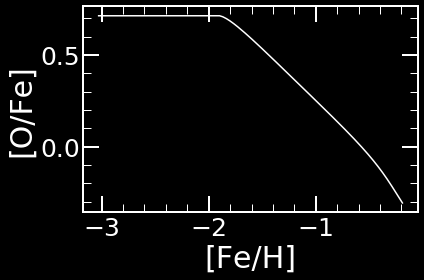

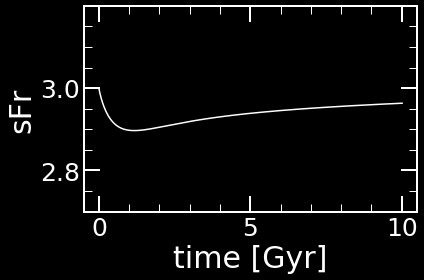

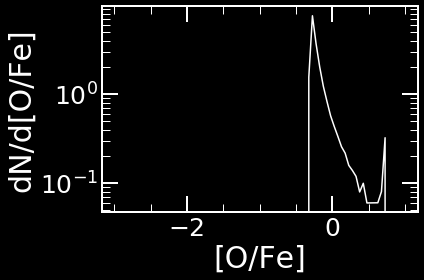

In [9]:
# The following line forces graphics to be displayed 
%matplotlib inline 
out.show("[O/Fe]-[Fe/H]")
out.show("sFr")
out.show("dN/d[O/Fe]")

If the track in the [O/Fe]-[Fe/H] plane looks odd to you, don't worry! It should look weird. This is because this was ran using the default yield settings, which are user-specified. Now let's turn to how to change them.

How To Customize Core Collapse Supernovae Yields
==
Core collapse yields are stored at the global level in VICE. The user can modify their yields directly, specify functions of metallicity, and save default yield settings. When the user would like to save new default yield settings, this can be done by calling vice.ccsne_yields.save_defaults().


In [10]:
print("Default oxygen yield: ", vice.yields.ccsne.settings['o'])
vice.yields.ccsne.settings['o'] = 0.012
print("Modified oxygen yield: ", vice.yields.ccsne.settings['o'])
def oxygen_yield(z):
    if z <= 0.0014: 
        return 0.012
    else:
        return 0.012 + 0.01 * (z / 0.01)
vice.yields.ccsne.settings['o'] = oxygen_yield 
print("Functional oxygen yield: ", vice.yields.ccsne.settings['o'])
print("Functional oxygen yield at Z = 0.005: ", vice.yields.ccsne.settings['o'](0.005))
vice.yields.ccsne.settings.restore_defaults()
print("Back to default oxygen yield: ", vice.yields.ccsne.settings['o'])

Default oxygen yield:  0.00564
Modified oxygen yield:  0.012
Functional oxygen yield:  <function oxygen_yield at 0x1166b1290>
Functional oxygen yield at Z = 0.005:  0.017
Back to default oxygen yield:  0.00564


Built-in Yield Tables
--
VICE makes the yield tables published in Chieffi & Limongi (2004), Chieffi & Limongi (2013), Limgoni & Chieffi (2018), and Woosley & Weaver (1995) available for automatic import.  The parameters with which the yields are calculated can be modified via the set_params() function in each module. 

In [11]:
from vice.yields.ccsne import LC18 # Limongi & Chieffi (2018) 
from vice.yields.ccsne import CL13 # Chieffi & Limongi (2013) 
from vice.yields.ccsne import CL04 # Chieffi & Limongi (2004) 
from vice.yields.ccsne import WW95 # Woosley & Weaver (1995) 

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/vice/yields/ccsne/LC18/__init__.py:71: ScienceWarning: The Limongi & Chieffi (2018), ApJS, 237, 13 study did not report yields for the element ru. If adopting these yields for simulation, it is likely that this yield can be approximated as zero at this metallicity. Users may exercise their own discretion by modifying their CCSN yield settings directly.
  _RECOGNIZED_ELEMENTS_[i], study = "LC18", **kwargs)[0]
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/vice/yields/ccsne/LC18/__init__.py:71: ScienceWarning: The Limongi & Chieffi (2018), ApJS, 237, 13 study did not report yields for the element rh. If adopting these yields for simulation, it is likely that this yield can be approximated as zero at this metallicity. Users may exercise their own discretion by modifying their CCSN yield settings directly.
  _RECOGNIZED_ELEMENTS_[i], study = "LC18", **kwargs)[0]
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/vice/yie

/Users/astrobeard/anaconda3/lib/python3.7/site-packages/vice/yields/ccsne/WW95/__init__.py:70: ScienceWarning: The Woosley & Weaver (1995) ApJ, 101, 181 study did not report yields for the element ge. If adopting these yields for simulation, it is likely that this yield can be approximated as zero at this metallicity. Users may exercise their own discretion by modifying their CCSN yield settings directly.
  __settings[i] = __fractional(i, study = "WW95", **kwargs)[0]
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/vice/yields/ccsne/WW95/__init__.py:70: ScienceWarning: The Woosley & Weaver (1995) ApJ, 101, 181 study did not report yields for the element as. If adopting these yields for simulation, it is likely that this yield can be approximated as zero at this metallicity. Users may exercise their own discretion by modifying their CCSN yield settings directly.
  __settings[i] = __fractional(i, study = "WW95", **kwargs)[0]
/Users/astrobeard/anaconda3/lib/python3.7/site-packages/

How to Customize Type Ia Supernovae Yields
==
Type Ia supernovae yields are also stored at the global level in VICE. The user can modify their yields directly and 
save default yield settings, but VICE currently does not support functional forms for these yields. When the user would like to save new default yield settings, this can be done by calling vice.sneia_yields.save_defaults(). 

In [12]:
print("Default iron yield: ", vice.yields.sneia.settings["fe"])
vice.yields.sneia.settings['fe'] = 0.0017 
print("Modified iron yield: ", vice.yields.sneia.settings["fe"]) 
vice.yields.sneia.settings.restore_defaults() 
print("Back to default iron yield: ", vice.yields.sneia.settings["fe"])

Default iron yield:  0.00258
Modified iron yield:  0.0017
Back to default iron yield:  0.00258


Built-in Yield Tables 
-- 
VICE makes the yield tables published in Iwamoto et al. (1999) and Seitenzahl et al. (2013) available for automatic import. The parameters with which the yields are calculated can be modified via the set_params() function in each module. 

In [13]:
from vice.yields.sneia import iwamoto99 
from vice.yields.sneia import seitenzahl13 

How to Calculate Nucleosynthetic Yields with VICE
==
VICE has built-in functions for calculating nucleosynthetic yields given the results of previous studies in the literature that commonly appear in chemical evolution codes. The integrator and the yield settings themselves, however, know nothing about these functions - what the user specifies as a yield is what VICE will use as a yield. These functions simply make it easy to calculate them. The user can take the output from these functions and use them as their yield settings if they so choose. 

In [14]:
print("Fractional yield of oxygen according to the Limongi & Chieffi (2018) study at solar metallicity: %.2e" % (
     vice.yields.ccsne.fractional("o", study = "LC18")[0]))
print("Fractional yield of iron according to the Woosley & Weaver (1995) study at 1/10th solar metallicity: %.2e" % ( 
     vice.yields.ccsne.fractional("fe", study = "ww95", MoverH = -1)[0]))

Fractional yield of oxygen according to the Limongi & Chieffi (2018) study at solar metallicity: 4.86e-03
Fractional yield of iron according to the Woosley & Weaver (1995) study at 1/10th solar metallicity: 1.10e-03


/Users/astrobeard/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ScienceWarning: Supernovae yields from the Woosley & Weaver (1995) ApJ, 101, 181 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
  after removing the cwd from sys.path.


Asymptotic Giant Branch Star Yields in VICE 
==
Because yields and enrichment patterns from AGB stars (see VICE's science documentation for details) are much more mathematically complex than that of supernovae, VICE unfortunately does not allow much room for customization here. Future updates will address this. In its current state users are restricted to the set of yield tables determined by 
the Karakas (2010), MNRAS, 403, 1413 and Cristallo et al. (2011), ApJS, 197, 17 studies. Their tables are built into VICE, and the function agb_yield_grid returns the fractional yields on a stellar mass-metallicity grid according to these studies.

In [15]:
y, m, z = vice.yields.agb.grid("sr")
print(y)
print(m)
print(z)
print("Fractional yield of strontium at M = 2 Msun and Z = 0.008: %.2e" % (y[2][6]))

((1.49308e-09, 2.90538e-09, 2.32254e-09, 6.00077e-09, 5.57923e-09, 1.06362e-08, 2.75977e-09, 1.60792e-09, 0.0, 0.0), (1.1972e-09, 6.602e-09, 5.88267e-09, 1.51227e-08, 1.8252e-08, 4.83933e-08, 4.59267e-08, 6.62133e-08, 6.91667e-08, 5.88067e-08), (1.65915e-09, 4.049e-09, 1.806e-08, 3.5945e-08, 5.8725e-08, 1.613e-07, 1.921e-07, 2.5705e-07, 2.905e-07, 3.5485e-07), (2.2304e-09, 2.2884e-09, 1.25676e-08, 2.6092e-08, 6.0148e-08, 2.4048e-07, 3.5096e-07, 4.406e-07, 5.3988e-07, 6.576e-07), (3.276e-09, 4.95967e-09, 1.02313e-08, 1.937e-08, 2.10133e-08, 7.327e-08, 1.69567e-07, 2.50733e-07, 3.758e-07, 5.44667e-07), (4.94525e-09, 3.20825e-09, 5.3265e-09, 6.14275e-09, 1.11025e-08, 4.71e-08, 2.19275e-08, 3.2675e-08, 4.5595e-08, 1.19675e-07), (4.6852e-09, 3.3318e-09, 3.6388e-09, 3.7674e-09, 3.8456e-09, 6.292e-09, 1.117e-08, 1.0644e-08, 1.1176e-08, 1.2814e-08), (1.01867e-09, 1.77433e-09, 3.242e-09, 1.833e-09, 7.495e-10, 1.78067e-09, 3.18183e-09, 4.84917e-09, 3.98567e-09, 4.28333e-09))
(1.3, 1.5, 2.0, 2.5,

Single Stellar Populations
==
Many chemical evolution studies are concerned with the rate of mass production of a given element with time from only one stellar population. Whatever happens to those metals once produced (diluted by inflows, ejected in the outflow, etc.) is not necessarily of interest. For this reason, VICE includes the function single_stellar_population, which determines the mass of a given element at timesteps following the formation of a stellar population with given initial mass and metallicity. 

In [16]:
mass, time = vice.single_stellar_population("fe", mstar = 1e4, Z = 0.01, time = 10)
print("""Mass yield of iron in Msun at 10 Gyr after the formation of a 10^4 Msun stellar population with metallicity 
Z = 0.01: %.2e""" % (mass[-1])) 
mass, time = vice.single_stellar_population("sr", mstar = 1e4, Z = 0.007, time = 8.5)
print("""Mass yield of strontium in Msun 8.5 Gyr after the formation of a single stellar population with metallicity 
Z = 0.007: %.2e""" % (mass[-1]))

Mass yield of iron in Msun at 10 Gyr after the formation of a 10^4 Msun stellar population with metallicity 
Z = 0.01: 3.44e+01
Mass yield of strontium in Msun 8.5 Gyr after the formation of a single stellar population with metallicity 
Z = 0.007: 2.61e-04


Other Useful Features
==
VICE includes three more dataframes included primarily for user convenience. Their names are solar_z, atomic_number, and sources, and they encode the solar abundance by mass as determined by Asplund et al. (2009), ARA&A, 47, 481, the atomic number, and the dominant enrichment channels that astronomers believe produce each element. Unlike other VICE dataframes, they do not allow user customization. The only one that influences VICE's simulations is the solar_z dataframe. 

In [17]:
print("The solar abundance of oxygen: %.2e" % (vice.solar_z["o"]))
print("The solar abundance of iron: %.2e" % (vice.solar_z["fe"])) 
print("The atomic number of nickel: %d" % (vice.atomic_number["ni"]))
print("The dominant enrichment sources of calcium: ", vice.sources["ca"])

The solar abundance of oxygen: 5.72e-03
The solar abundance of iron: 1.29e-03
The atomic number of nickel: 28
The dominant enrichment sources of calcium:  ['CCSNE', 'SNEIA']
